# Exploration of the .skeleton files provided in the NTU-RGB-D dataset

The aim of this notebook is to extract the 3D coordinates of the .skeleton files and play them back. The sample names follow the notation SsssCcccPpppRrrrAaaa with :

S : setup number 

C : camera id

P : performer id

R : replication number

A : action label

In [1]:
%matplotlib notebook
import numpy as np
import os
import random
import sys

from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from play_skeleton import *
from src.utils.joints import *
from src.data.read_NTU_RGB_D_skeleton import *

# Global variables (change depending on your setup)
project_dir = os.getcwd() + '/../'
raw_data = project_dir + "data/raw/"
skeleton_folder = raw_data + "nturgb+d_skeletons/"


## 1. Choose a random sample

In [2]:
sample_name = os.path.splitext(random.choice(os.listdir(skeleton_folder)))[0]
# sample_name= "S001C002P001R001A011"
# sample_name = "S002C002P007R002A017"
sample_name = "S011C003P018R001A027"
print("Chosen sample name : " + str(sample_name))

Chosen sample name : S011C003P018R001A027


## 2. Extract skeleton coordinates

read_xyz(...) returns a (3, max_frame, num_joint=25, 2) numpy array

read_color_xy(...) returns (2, max_frame, num_joint=25, 2) numpy array

In [3]:
skeleton = read_xyz(skeleton_folder + sample_name + ".skeleton") # shape (3, 103, 25, 2)

print("===== 3D skeleton =====")
print(skeleton[:, 0, :, 0])
print(skeleton.transpose(3, 2, 0, 1)[0].shape)

has_2_subjects = np.any(skeleton[:, :, :, 1])
print("Number of subjects : " + str(int(has_2_subjects) * 2))

===== 3D skeleton =====
[[-0.35  -0.358 -0.366 -0.346 -0.512 -0.533 -0.511 -0.481 -0.202 -0.178
  -0.166 -0.17  -0.417 -0.442 -0.462 -0.439 -0.275 -0.254 -0.272 -0.251
  -0.364 -0.478 -0.458 -0.171 -0.193]
 [-0.108  0.161  0.424  0.553  0.323  0.082 -0.132 -0.184  0.332  0.081
  -0.133 -0.194 -0.11  -0.313 -0.624 -0.687 -0.103 -0.306 -0.651 -0.714
   0.359 -0.226 -0.173 -0.255 -0.193]
 [ 3.124  3.042  2.949  2.906  2.964  3.032  3.019  3.027  3.021  3.091
   3.107  3.102  3.081  3.176  3.383  3.273  3.1    3.195  3.41   3.301
   2.974  3.043  3.012  3.125  3.081]]
(25, 3, 61)
Number of subjects : 2


## 3. Playback skeleton animation (first subject only)

<IPython.core.display.Javascript object>


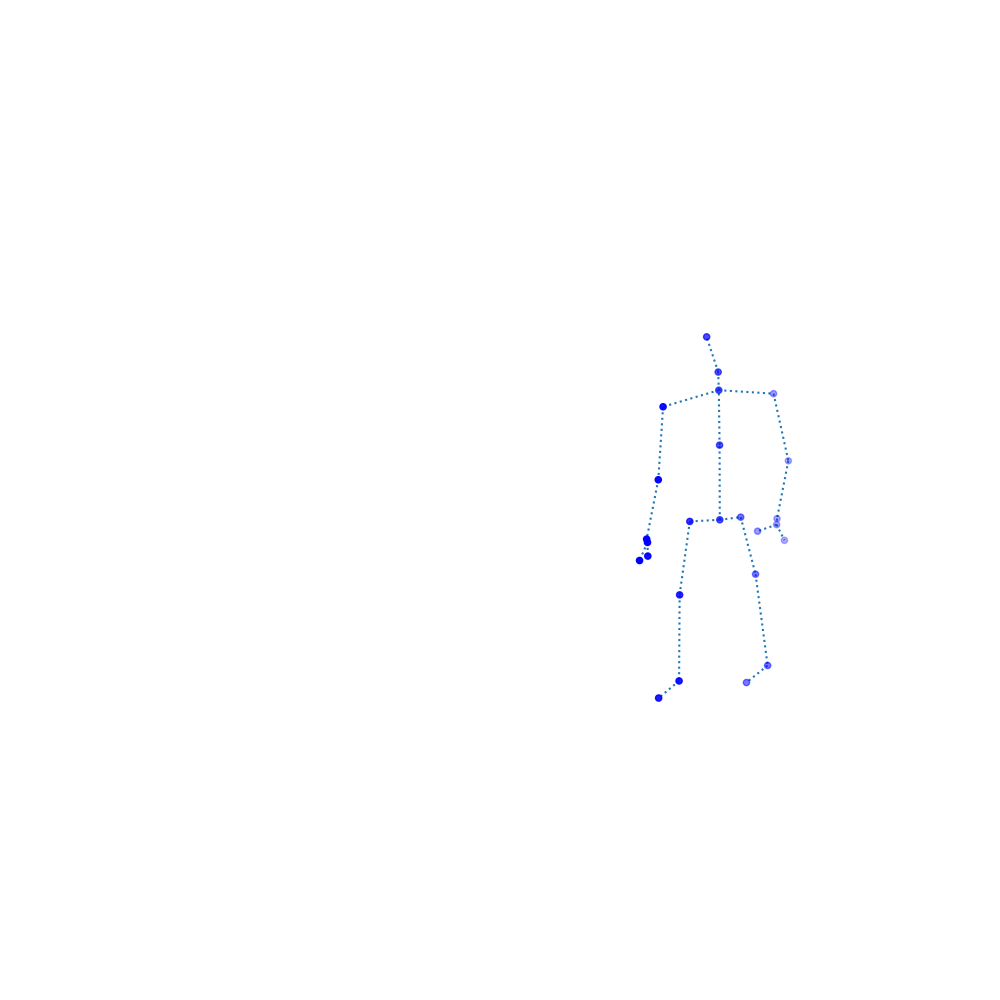

In [4]:
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)